## 1 Импорт библиотек и модулей

In [5]:
# для работы с таблицами
import pandas as pd

# для визуализации
import matplotlib.pyplot as plt

# для подготовки фото для модели
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2 Исследовательский анализ данных
Загрузим метки.

In [11]:
path = '/datasets/faces/'
labels = pd.read_csv(path + 'labels.csv')

Посмотрим размер выборки.

In [12]:
labels.shape[0]

7591

Выведем первые 5 строчек датафрейма.

In [13]:
labels.head(5)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


Изучим основную информацию о датафрейме.

In [14]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


- **В данных 7591 строк, 2 столбца, 2 типа данных: int64, object.**
- **Пропуски и аномалии отсутсвуют.**

Изучим распределение возраста в выборке.

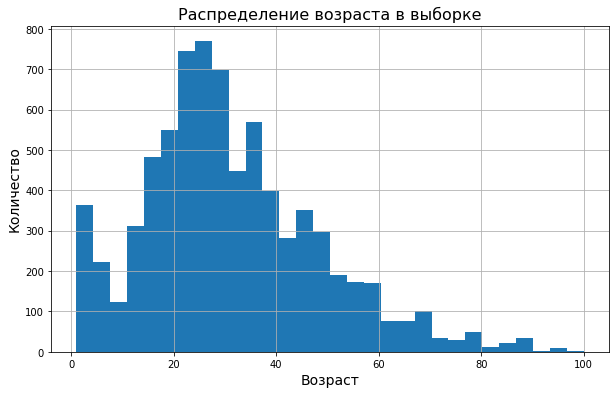

In [6]:
labels['real_age'].hist(bins=30, figsize=(10, 6))
plt.xlabel('Возраст', size=14)
plt.ylabel('Количество', size=14)
plt.title('Распределение возраста в выборке', size=16)
plt.show()

- **Распределение нормальное.**
- **Больше всего фото с людьми 20-30 лет, значит их возраст модель будет лучше всего определять.**
- **Меньше всего фото с людьми 80-100 лет, значит их возраст модель будет хуже всего определять.**
- **Также присуттвует выброс около 0, значит дети будут хорошо распознаваться.**

Загрузим изображения.

In [4]:
datagen = ImageDataGenerator(rescale=1./255)
train_datagen = datagen.flow_from_dataframe(
    labels,
    x_col='file_name',
    y_col='real_age',
    class_mode='raw',
    directory=path + 'final_files',
    target_size=(224, 224),
    batch_size=32)

Found 7591 validated image filenames.


Напечатаем на экране 15 фото.

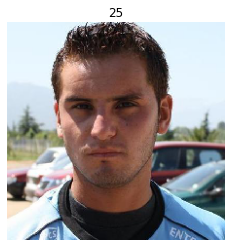

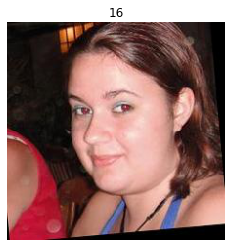

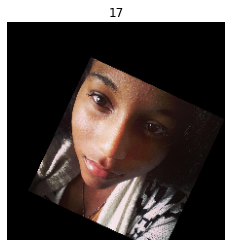

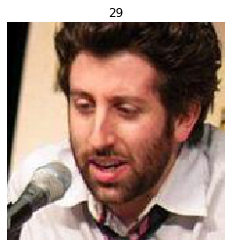

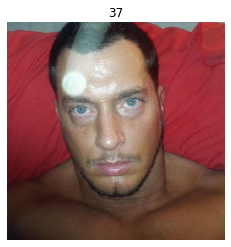

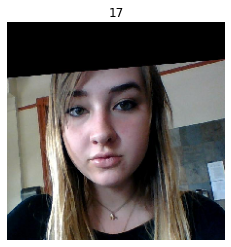

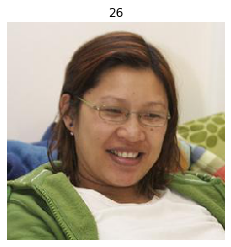

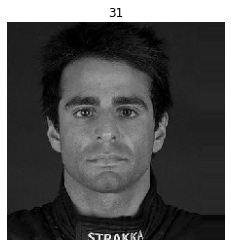

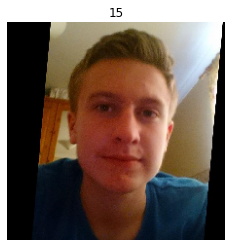

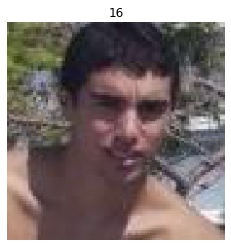

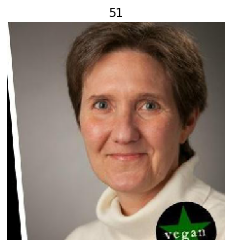

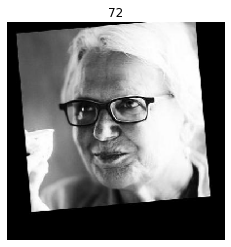

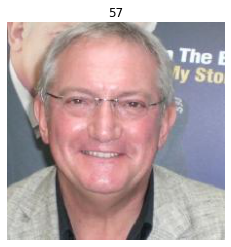

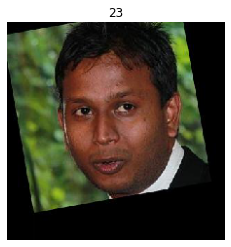

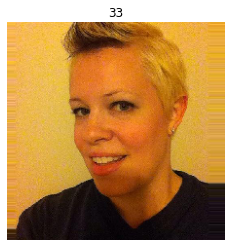

In [9]:
for i in range(15):
    features, target = next(train_datagen)
    plt.imshow(features[0])
    plt.title(target[0])
    plt.axis('off')
    plt.show()

**Можно сделать вывод, что выборка состоит в основном из портретов.**

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Результаты исследовательского анализа данных:</b>
        <li>Распределение возраста в выборке нормальное.</li>
        <li>Больше всего фото с людьми 20-30 лет, значит их возраст модель будет лучше всего определять.</li>
        <li>Меньше всего фото с людьми 80-100 лет, значит их возраст модель будет хуже всего определять.</li>
        <li>На графике распределения присутвует выброс около 0, значит дети будут хорошо распознаваться.</li>
        <li>Выборка состоит в основном из портретов.</li>
   </p>  
</div>

## 3 Обучение модели

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

optimizer = Adam(lr=0.0001)


def load_train(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255, horizontal_flip=True)
    train_datagen = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=0)
    return train_datagen


def load_test(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255)
    test_datagen = datagen.flow_from_dataframe(
        pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=0)
    return test_datagen

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mae',
                  metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=8,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model

```

```
Train for 178 steps, validate for 60 steps
Epoch 1/8
178/178 - 78s - loss: 10.8612 - mae: 10.8609 - val_loss: 24.4288 - val_mae: 24.4127
Epoch 2/8
178/178 - 51s - loss: 7.0701 - mae: 7.0697 - val_loss: 23.1012 - val_mae: 23.0855
Epoch 3/8
178/178 - 56s - loss: 6.2147 - mae: 6.2146 - val_loss: 12.2954 - val_mae: 12.2484
Epoch 4/8
178/178 - 62s - loss: 5.4532 - mae: 5.4530 - val_loss: 8.1102 - val_mae: 8.1394
Epoch 5/8
178/178 - 63s - loss: 5.0213 - mae: 5.0217 - val_loss: 7.4941 - val_mae: 7.5025
Epoch 6/8
178/178 - 45s - loss: 4.6870 - mae: 4.6869 - val_loss: 6.3691 - val_mae: 6.3768
Epoch 7/8
178/178 - 63s - loss: 4.2760 - mae: 4.2759 - val_loss: 6.3208 - val_mae: 6.3325
Epoch 8/8
178/178 - 63s - loss: 4.0649 - mae: 4.0650 - val_loss: 5.8732 - val_mae: 5.8693
60/60 - 11s - loss: 5.8732 - mae: 5.8693
Test MAE: 5.8693

```

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Модель построена с учётом требований заказчика и готова решить поставленные бизнесом задачи.</b> 
   </p>  
</div>

## 4 Отчёт

<hr style="color: steelblue; background-color: steelblue; height: 5px; border: none;">

### Описание ключевых шагов решения
- При исследовании данных было выявлено следующее:
   1. Распределение возраста в выборке нормальное;
   1. Больше всего фото с людьми 20-30 лет, значит их возраст модель будет лучше всего определять;
   1. Меньше всего фото с людьми 80-100 лет, значит их возраст модель будет хуже всего определять;
   1. На графике распределения присутвует выброс около 0, значит дети будут хорошо распознаваться;
   1. Выборка состоит в основном из портретов.
- Модель была построена с учётом требований заказчика.

***

### Описание модели
Основа модели — ResNet-50 — сверточная нейронная сеть глубиной в 50 слоев. Далее идёт слой субдискретизации. И завершающий слой  — полносвязный слой.

***

### Итоговая метрика
MAE 5.8693	

<hr style="color: steelblue; background-color: steelblue; height: 5px; border: none;">